In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Membaca dataset
data_nilai = pd.read_csv('dataset/Sample Nilai Alumni Prodi Informatika_Ver1.csv')
data_profesi = pd.read_csv('dataset/Sample Profesi Pekerjaan Alumni Prodi Informatika Universitas Gunadarma_Ver1.csv')

In [3]:
data_nilai.head(10)

,NPM,KDMK,NAMA MK,JENIS,SKS,NILAI
0,50414234,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
1,50414279,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
2,50414496,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
3,50414623,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
4,50414925,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,A
5,50415185,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
6,50415335,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
7,50415370,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,C
8,50415582,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B
9,50415780,IT045201,ALGORITMA DAN PEMROGRAMAN 1,W,2,B


In [4]:
data_profesi.head(10)

,NPM,Nama Lengkap,IPK,Klasifikasi Profesi
0,50414234,ADI NUGRAHA YUNANDA,3.30,Software Engineer
1,50414279,ADITIA SEPTIANDI,3.10,Data Engineer
2,50414496,AGUS ANIN FALAHUDIN,3.25,Data Analyst
3,50414623,AHMAD ZULFIKAR,3.38,Software Engineer
4,50414925,ALZA ICHSAN KURNIAWAN,3.72,Mobile App Developer
5,51414049,ANDI MUHADIR AMIN,3.19,Mobile App Developer
6,51414092,ANDINITA NURUL HIDAYAH,3.57,Software Quality Engineer
7,51414196,ANGGA ELVIN PRATAMA,3.31,Data Engineer
8,51414598,ARIF RACHMAN,3.32,Graphic Designer
9,51414845,AUNI RACHMAN,3.20,Software Quality Assurance


In [5]:
# Remove the columns 'KDMK' and 'JENIS' from the 'nilai_alumni' dataset
nilai_alumni_cleaned = data_nilai.drop(columns=['KDMK', 'JENIS'])

# Remove the column 'Nama Lengkap' from the 'data_profesi' dataset
data_profesi_cleaned = data_profesi.drop(columns=['Nama Lengkap'])

In [6]:
# Merge the two datasets based on 'NPM' and perform one-hot encoding on the 'NAMA MK' (subject names) column
merged_data = pd.merge(data_profesi_cleaned, nilai_alumni_cleaned, on='NPM')

In [7]:
merged_data.head(10)

,NPM,IPK,Klasifikasi Profesi,NAMA MK,SKS,NILAI
0,50414234,3.3,Software Engineer,ALGORITMA DAN PEMROGRAMAN 1,2,A
1,50414234,3.3,Software Engineer,ALGORITMA DAN PEMROGRAMAN 2,2,B
2,50414234,3.3,Software Engineer,ALGORITMA DAN PEMROGRAMAN 3,2,A
3,50414234,3.3,Software Engineer,ALGORITMA DAN PENGOLAHAN PARALEL,3,B
4,50414234,3.3,Software Engineer,ALGORITMA DEEP LEARNING,2,A
5,50414234,3.3,Software Engineer,ARSITEKTUR KOMPUTER,2,A
6,50414234,3.3,Software Engineer,BAHASA INDONESIA,2,A
7,50414234,3.3,Software Engineer,BAHASA INGGRIS 1,1,B
8,50414234,3.3,Software Engineer,BAHASA INGGRIS 2,1,B
9,50414234,3.3,Software Engineer,BAHASA INGGRIS BISNIS 1,1,A


In [8]:
# To see the count of each grade
grade_counts = merged_data['NILAI'].value_counts()
grade_counts


NILAI
A    8278
B    6297
C     793
D      52
Name: count, dtype: int64

In [9]:
# Change the data type of the 'NAMA MK' column to INDEX
merged_data['INDEX'] = merged_data['NAMA MK']

In [10]:

# Pivots the merged data table to create a table with the student's NPM, IPK, Klasifikasi Profesi as rows, and the subject indices as columns, with the student's grades as the values.

# The `pivot_table` function is used to reshape the data from a long format to a wide format, with the subject indices as the column names and the grades as the values. The `first` aggregation function is used to handle any duplicate grades for a student in a subject.

# The resulting `pivoted_grades` DataFrame will have the student information (NPM, IPK, Klasifikasi Profesi) as the index, and the subject grades as the columns, with 0 filled in for any subjects not taken by a student.


pivoted_grades = merged_data.pivot_table(
    index=['NPM', 'IPK', 'Klasifikasi Profesi'], 
    columns='INDEX', 
    values='NILAI', 
    aggfunc='first'  # Take the first occurrence if there are duplicates
).reset_index()

# Merge the pivoted table back to the original data to align with the rest of the information
# This will leave 0 for subjects not taken by each student

pivoted_grades.fillna(0, inplace=True)

pivoted_grades.head(10)

INDEX,NPM,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,50414234,3.30,Software Engineer,A,B,A,B,A,A,A,...,B,A,C,A,C,B,B,0,B,0
1,50414279,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,A,B,B,B,B,A,0,B,0
2,50414496,3.25,Data Analyst,B,B,B,B,A,A,B,...,A,A,A,C,B,A,A,0,B,0
3,50414623,3.38,Software Engineer,A,B,B,B,B,A,B,...,B,B,A,A,B,A,A,0,B,0
4,50414925,3.72,Mobile App Developer,A,B,A,A,A,A,B,...,0,A,A,A,A,A,A,0,B,0
5,50415185,3.29,IT Project Manager,B,B,A,B,A,B,B,...,B,A,A,B,B,B,A,0,B,0
6,50415335,3.36,Network Engineer,B,B,A,B,B,A,B,...,C,A,B,A,B,B,A,0,B,0
7,50415370,3.67,Software Quality Assurance,C,A,A,A,A,A,B,...,0,A,A,B,A,A,A,0,B,0
8,50415582,3.43,Mobile App Developer,B,B,A,B,A,A,B,...,B,B,B,B,A,A,A,0,B,0
9,50415780,3.09,Software Engineer,B,B,B,B,A,B,B,...,B,B,C,A,A,B,A,0,B,0


In [11]:
# Replace NaN values with 0 for the grade columns
pivoted_grades_filled = pivoted_grades.fillna(0)

# Display the updated data with NaN replaced by 0
pivoted_grades_filled.head(10)

INDEX,NPM,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,50414234,3.30,Software Engineer,A,B,A,B,A,A,A,...,B,A,C,A,C,B,B,0,B,0
1,50414279,3.10,Data Engineer,B,B,B,B,C,B,B,...,A,A,B,B,B,B,A,0,B,0
2,50414496,3.25,Data Analyst,B,B,B,B,A,A,B,...,A,A,A,C,B,A,A,0,B,0
3,50414623,3.38,Software Engineer,A,B,B,B,B,A,B,...,B,B,A,A,B,A,A,0,B,0
4,50414925,3.72,Mobile App Developer,A,B,A,A,A,A,B,...,0,A,A,A,A,A,A,0,B,0
5,50415185,3.29,IT Project Manager,B,B,A,B,A,B,B,...,B,A,A,B,B,B,A,0,B,0
6,50415335,3.36,Network Engineer,B,B,A,B,B,A,B,...,C,A,B,A,B,B,A,0,B,0
7,50415370,3.67,Software Quality Assurance,C,A,A,A,A,A,B,...,0,A,A,B,A,A,A,0,B,0
8,50415582,3.43,Mobile App Developer,B,B,A,B,A,A,B,...,B,B,B,B,A,A,A,0,B,0
9,50415780,3.09,Software Engineer,B,B,B,B,A,B,B,...,B,B,C,A,A,B,A,0,B,0


In [12]:
# Define the grade mapping
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1,}

# Apply the grade mapping to all relevant columns that contain grades
# We'll apply this mapping to all columns except 'NPM', 'IPK', 'Klasifikasi', and 'Profesi'

# Selecting only grade columns
grade_columns = pivoted_grades_filled.columns.difference(['NPM', 'IPK', 'Klasifikasi', 'Profesi'])

# Apply grade mapping to these columns
pivoted_grades_filled[grade_columns] = pivoted_grades_filled[grade_columns].replace(grade_mapping)


# Display the updated dataframe
pivoted_grades_filled.head(10)

INDEX,NPM,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,50414234,3.30,Software Engineer,4,3,4,3,4,4,4,...,3,4,2,4,2,3,3,0,3,0
1,50414279,3.10,Data Engineer,3,3,3,3,2,3,3,...,4,4,3,3,3,3,4,0,3,0
2,50414496,3.25,Data Analyst,3,3,3,3,4,4,3,...,4,4,4,2,3,4,4,0,3,0
3,50414623,3.38,Software Engineer,4,3,3,3,3,4,3,...,3,3,4,4,3,4,4,0,3,0
4,50414925,3.72,Mobile App Developer,4,3,4,4,4,4,3,...,0,4,4,4,4,4,4,0,3,0
5,50415185,3.29,IT Project Manager,3,3,4,3,4,3,3,...,3,4,4,3,3,3,4,0,3,0
6,50415335,3.36,Network Engineer,3,3,4,3,3,4,3,...,2,4,3,4,3,3,4,0,3,0
7,50415370,3.67,Software Quality Assurance,2,4,4,4,4,4,3,...,0,4,4,3,4,4,4,0,3,0
8,50415582,3.43,Mobile App Developer,3,3,4,3,4,4,3,...,3,3,3,3,4,4,4,0,3,0
9,50415780,3.09,Software Engineer,3,3,3,3,4,3,3,...,3,3,2,4,4,3,4,0,3,0


In [13]:
# Get a random NPM from the data
random_npm = pivoted_grades_filled['NPM'].sample().values[0]

print(f"Randomly selected NPM: {random_npm}")

# Get the data for this random NPM
random_student_data = pivoted_grades_filled[pivoted_grades_filled['NPM'] == random_npm]

# Display the data for the randomly selected student
random_student_data

Randomly selected NPM: 54419985


INDEX,NPM,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
120,54419985,3.52,Graphic Designer,2,4,4,3,4,4,3,...,0,4,3,3,4,4,4,4,3,4


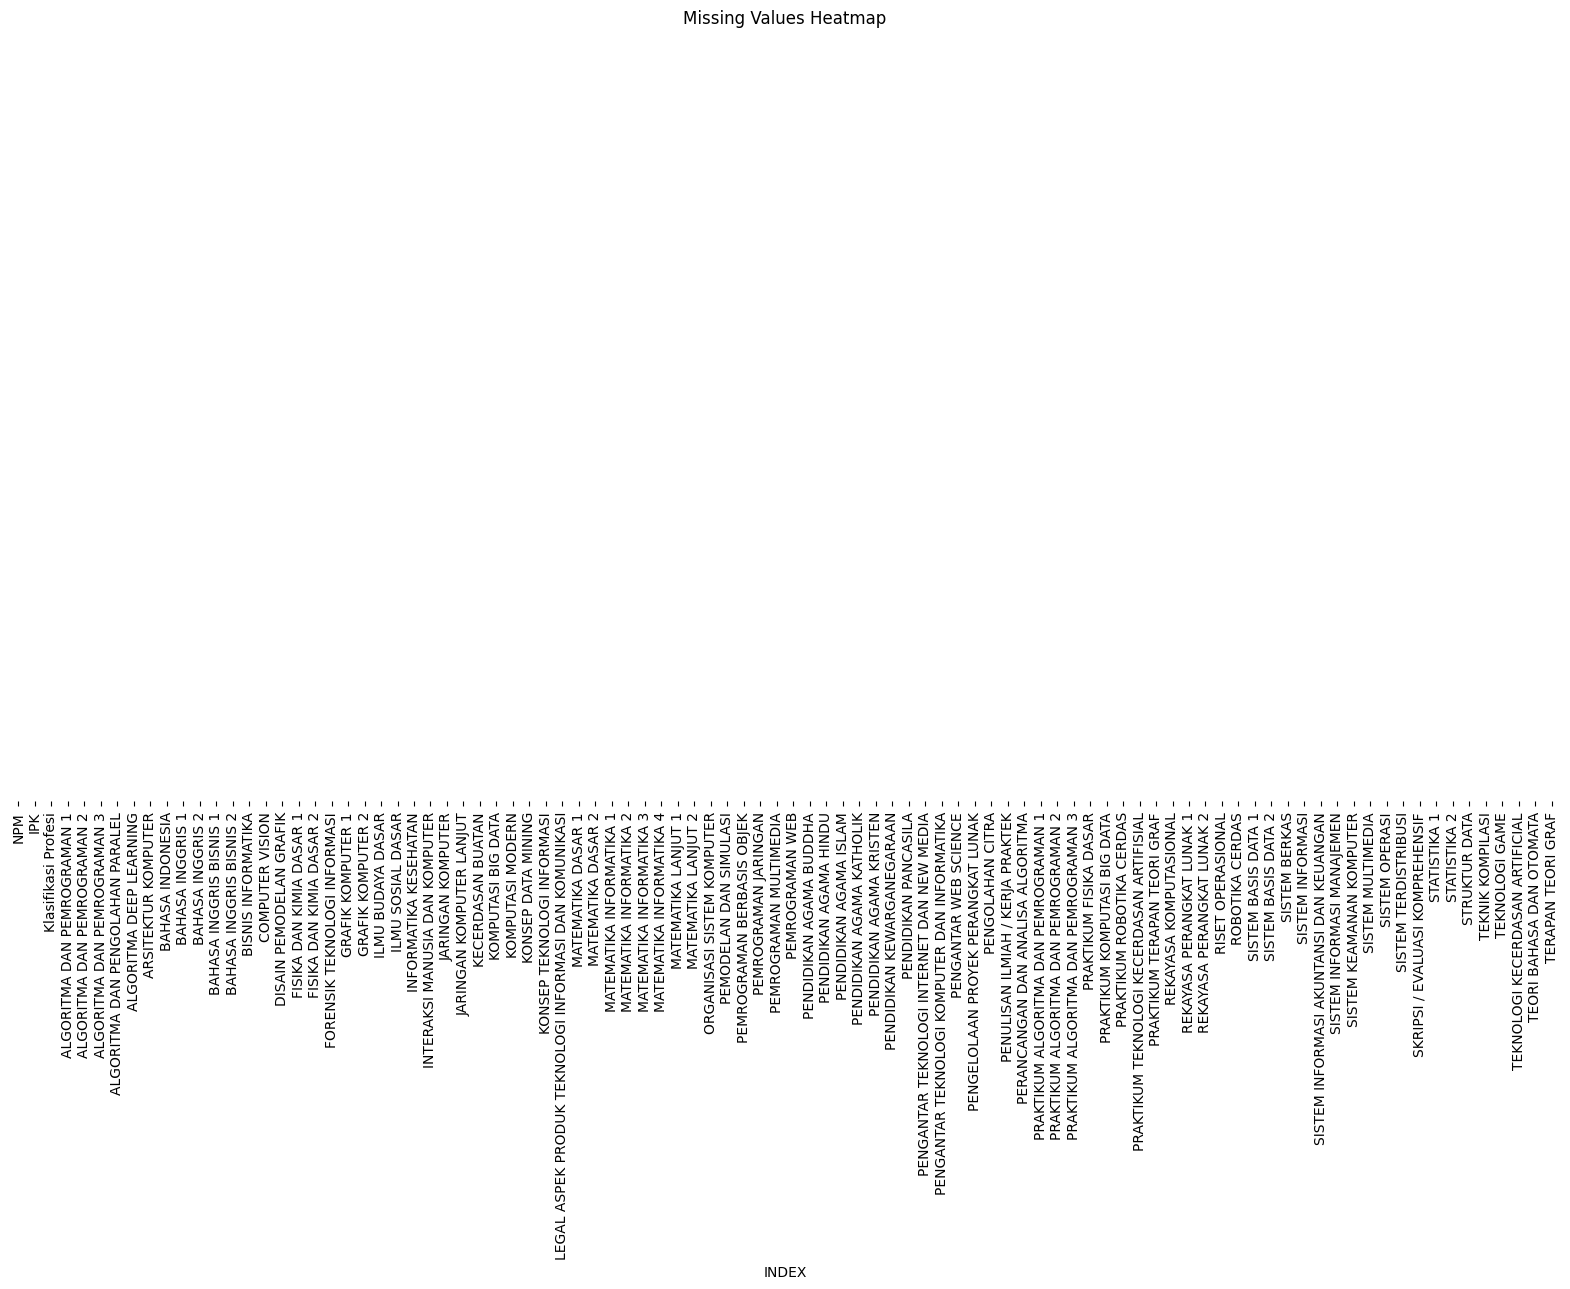

In [14]:
# Create a binary mask where 0 is True and non-zero is False
mask = pivoted_grades_filled.isnull()

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Create the heatmap
sns.heatmap(mask, cmap='binary', cbar=False, yticklabels=False)

# Set the title
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()

## Eksplorasi Data

In [15]:
# Step 1: Basic statistics of the numerical columns
basic_stats = pivoted_grades_filled.describe()

# Step 2: Distribution of predicted professions
profession_distribution = pivoted_grades_filled['Klasifikasi Profesi'].value_counts()

basic_stats

INDEX,IPK,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,BAHASA INGGRIS 1,BAHASA INGGRIS 2,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,3.486582,3.505102,3.352041,3.494898,3.295918,3.693878,3.632653,3.408163,3.346939,3.464286,...,1.581633,3.831633,3.464286,3.352041,3.459184,3.586735,3.688776,0.857143,3.285714,1.142857
std,0.250102,0.540631,0.499791,0.501254,0.549297,0.606092,0.493813,0.578889,0.665672,0.666987,...,1.685068,0.449751,0.635489,0.659095,0.584735,0.552503,0.624357,1.607674,0.572892,1.794579
min,2.820000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,2.000000,0.000000
25%,3.300000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,0.000000,3.000000,0.000000
50%,3.490000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,...,0.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,0.000000,3.000000,0.000000
75%,3.700000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,4.000000,4.000000
max,3.980000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [16]:
profession_distribution

Klasifikasi Profesi
Software Engineer             42
Software Quality Assurance    32
Mobile App Developer          16
Full Stack Developer          15
Data Analyst                  12
Back End Developer            11
Data Engineer                  7
Graphic Designer               6
UI/UX Designer                 5
Web Developer                  5
IT Entrepreneur                5
Front End Developer            5
IT Project Manager             4
Network Engineer               4
Network Administrator          3
Data Scientist                 3
Business Analyst               3
Database Administrator         3
Lecturer                       3
IT Consultant                  3
IT Lecturer                    2
DevOps Engineer                2
Network Security Engineer      1
Cyber Security Manager         1
System Analyst                 1
Software Quality Engineer      1
Cyber Security Analyst         1
Name: count, dtype: int64

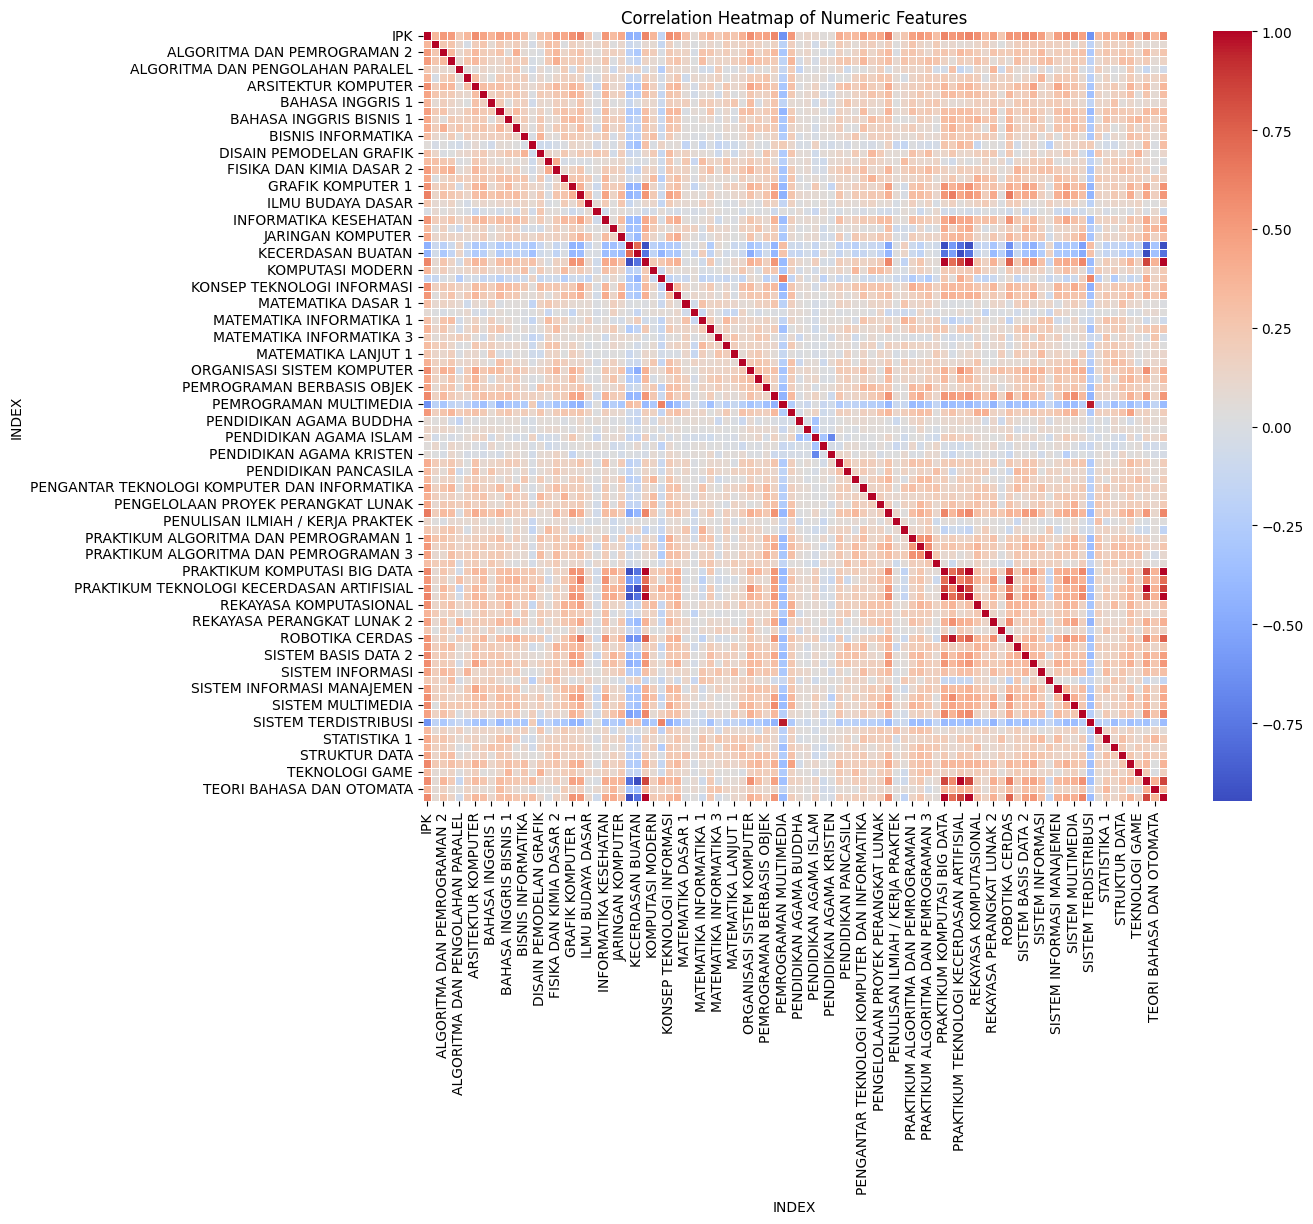

In [17]:
# Select only numeric columns
numeric_columns = pivoted_grades_filled.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix using only numeric columns
correlation_matrix = pivoted_grades_filled[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [18]:
# Let's find the top correlations by unstacking the correlation matrix
top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Filter the top correlations (above 0.8) to find significant relationships
significant_correlations = top_correlations[(top_correlations > 0.8) & (top_correlations < 1.0)]

significant_correlations.head(10)

INDEX                                      INDEX                                    
KOMPUTASI BIG DATA                         TERAPAN TEORI GRAF                           0.998408
PRAKTIKUM KOMPUTASI BIG DATA               KOMPUTASI BIG DATA                           0.997686
TERAPAN TEORI GRAF                         PRAKTIKUM KOMPUTASI BIG DATA                 0.996076
PRAKTIKUM KOMPUTASI BIG DATA               PRAKTIKUM TERAPAN TEORI GRAF                 0.995986
PRAKTIKUM TERAPAN TEORI GRAF               KOMPUTASI BIG DATA                           0.995530
TEKNOLOGI KECERDASAN ARTIFICIAL            PRAKTIKUM TEKNOLOGI KECERDASAN ARTIFISIAL    0.994154
TERAPAN TEORI GRAF                         PRAKTIKUM TERAPAN TEORI GRAF                 0.993900
PRAKTIKUM ROBOTIKA CERDAS                  ROBOTIKA CERDAS                              0.974358
PEMROGRAMAN MULTIMEDIA                     SISTEM TERDISTRIBUSI                         0.961037
PRAKTIKUM TEKNOLOGI KECERDASAN ARTIFISIAL 

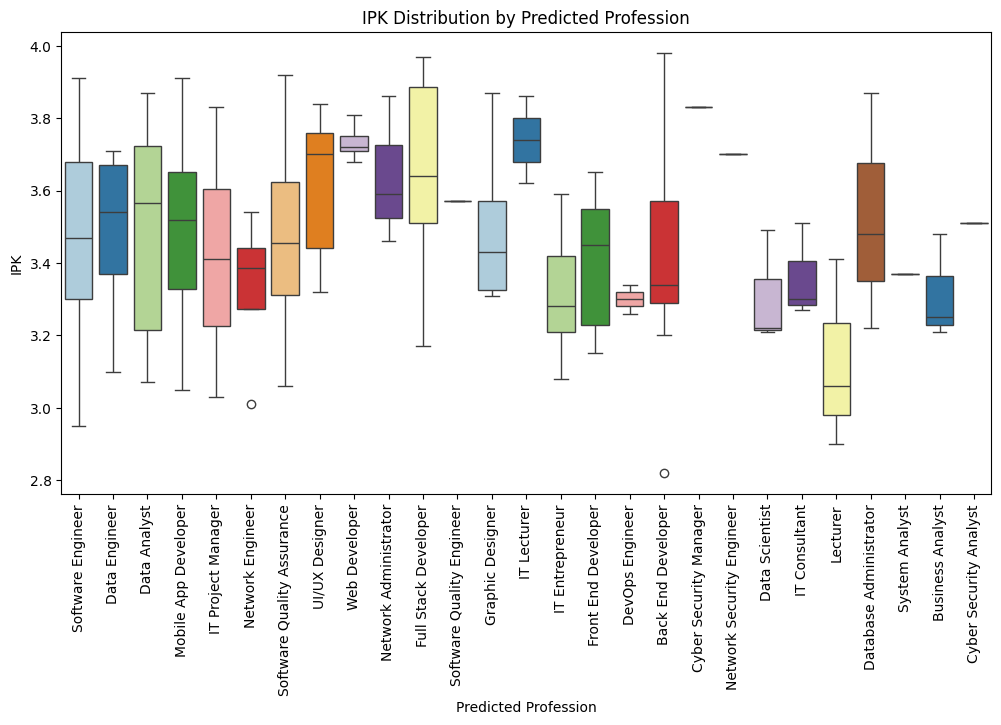

In [19]:
# Create a boxplot to show the distribution of IPK by profession
plt.figure(figsize=(12, 6))
sns.boxplot(x='Klasifikasi Profesi', y='IPK', data=pivoted_grades_filled, palette='Paired')
plt.xticks(rotation=90)
plt.title('IPK Distribution by Predicted Profession')
plt.ylabel('IPK')
plt.xlabel('Predicted Profession')
plt.show()


In [20]:
pivoted_grades_filled

INDEX,NPM,IPK,Klasifikasi Profesi,ALGORITMA DAN PEMROGRAMAN 1,ALGORITMA DAN PEMROGRAMAN 2,ALGORITMA DAN PEMROGRAMAN 3,ALGORITMA DAN PENGOLAHAN PARALEL,ALGORITMA DEEP LEARNING,ARSITEKTUR KOMPUTER,BAHASA INDONESIA,...,SISTEM TERDISTRIBUSI,SKRIPSI / EVALUASI KOMPREHENSIF,STATISTIKA 1,STATISTIKA 2,STRUKTUR DATA,TEKNIK KOMPILASI,TEKNOLOGI GAME,TEKNOLOGI KECERDASAN ARTIFICIAL,TEORI BAHASA DAN OTOMATA,TERAPAN TEORI GRAF
0,50414234,3.30,Software Engineer,4,3,4,3,4,4,4,...,3,4,2,4,2,3,3,0,3,0
1,50414279,3.10,Data Engineer,3,3,3,3,2,3,3,...,4,4,3,3,3,3,4,0,3,0
2,50414496,3.25,Data Analyst,3,3,3,3,4,4,3,...,4,4,4,2,3,4,4,0,3,0
3,50414623,3.38,Software Engineer,4,3,3,3,3,4,3,...,3,3,4,4,3,4,4,0,3,0
4,50414925,3.72,Mobile App Developer,4,3,4,4,4,4,3,...,0,4,4,4,4,4,4,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,59414863,3.83,IT Project Manager,4,4,4,4,4,4,4,...,0,4,4,4,4,4,4,0,3,0
192,5B416937,3.48,Database Administrator,4,4,4,4,4,4,4,...,3,4,3,3,3,4,2,0,3,0
193,5C414051,3.22,Mobile App Developer,3,3,3,3,3,3,2,...,4,4,3,4,4,3,4,0,3,0
194,5C414646,3.07,Software Quality Assurance,4,3,4,3,3,4,3,...,3,3,2,4,2,3,3,0,3,0


## Modeling WGAN

In [26]:
# One-hot encode the profession
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming 'Klasifikasi Profesi' is your target label (profession)
label_encoder = LabelEncoder()
pivoted_grades_filled['Profesi_Encoded'] = label_encoder.fit_transform(pivoted_grades_filled['Klasifikasi Profesi'])

# Select the features for prediction (e.g., IPK and scores)
X = pivoted_grades_filled.drop(['NPM', 'Klasifikasi Profesi', 'Profesi_Encoded'], axis=1)

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# check numbers of features in datasets
num_features = pivoted_grades_filled.shape[1] - 4
print(num_features)

91


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
from sklearn.manifold import TSNE

In [40]:
# Define the Generator model
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, output_size),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.net(x)

# Define the Critic (Discriminator) model
class Critic(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Critic, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, 1)
        )
    
    def forward(self, x):
        return self.net(x)

# Define hyperparameters
input_size = 100  # Size of the latent vector (noise)
hidden_size = 128
output_size = 91  # Number of features from the dataset (excluding the target variable)
batch_size = 64
epochs = 5000
critic_iterations = 5
weight_clipping_limit = 0.01
lr = 0.00001

# Load the dataset
data = X_scaled
X_train = data[:, :-1]  # Features
X_train = torch.tensor(X_train, dtype=torch.float32)

# Set device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate models
generator = Generator(input_size, hidden_size, output_size).to(device)
critic = Critic(output_size, hidden_size).to(device)

# Define optimizers
optimizer_G = optim.AdamW(generator.parameters(), lr=lr)
optimizer_C = optim.AdamW(critic.parameters(), lr=lr)

import matplotlib.pyplot as plt

# List to store loss values
losses_G = []
losses_C = []

# List to store evaluation metrics
mse_values = []
wasserstein_values = []

# Training loop
for epoch in range(epochs):
    for _ in range(critic_iterations):
        # Train the critic
        optimizer_C.zero_grad()
        
        # Sample real data
        real_data = X_train[torch.randint(0, X_train.size(0), (batch_size,))].to(device)
        
        # Sample noise and generate fake data
        noise = torch.randn(batch_size, input_size).to(device)
        fake_data = generator(noise)
        
        # Compute critic loss
        critic_real = critic(real_data)
        critic_fake = critic(fake_data.detach())
        loss_C = -(torch.mean(critic_real) - torch.mean(critic_fake))
        
        # Backpropagation and optimization for the critic
        loss_C.backward()
        optimizer_C.step()
        
        # Weight clipping for the critic
        for p in critic.parameters():
            p.data.clamp_(-weight_clipping_limit, weight_clipping_limit)
    
    # Train the generator
    optimizer_G.zero_grad()
    
    # Generate fake data
    noise = torch.randn(batch_size, input_size).to(device)
    fake_data = generator(noise)
    
    # Compute generator loss
    loss_G = -torch.mean(critic(fake_data))
    
    # Backpropagation and optimization for the generator
    loss_G.backward()
    optimizer_G.step()

    # Compute Mean Squared Error (MSE) between real and fake data
    mse = F.mse_loss(fake_data, real_data)
    mse_values.append(mse.item())
    
    # Wasserstein distance (just use the critic loss for the real and fake data)
    wasserstein_distance = torch.mean(critic_real) - torch.mean(critic_fake)
    wasserstein_values.append(wasserstein_distance.item())
    
    # Store losses for visualization
    losses_G.append(loss_G.item())
    losses_C.append(loss_C.item())
    
    # Print loss and metrics values every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss C: {loss_C.item()}, Loss G: {loss_G.item()}, MSE: {mse.item()}, Wasserstein: {wasserstein_distance.item()}')

Epoch [0/5000], Loss C: 0.00011261738836765289, Loss G: -0.009032098576426506, MSE: 0.9980255365371704, Wasserstein: -0.00011261738836765289
Epoch [100/5000], Loss C: -0.00024142954498529434, Loss G: -0.0075476584024727345, MSE: 1.0612248182296753, Wasserstein: 0.00024142954498529434
Epoch [200/5000], Loss C: -0.0010049017146229744, Loss G: -0.003960165660828352, MSE: 1.0642383098602295, Wasserstein: 0.0010049017146229744
Epoch [300/5000], Loss C: -0.005480674561113119, Loss G: -0.0019010500982403755, MSE: 1.0706840753555298, Wasserstein: 0.005480674561113119
Epoch [400/5000], Loss C: 0.002243385650217533, Loss G: -0.00512236263602972, MSE: 1.0315312147140503, Wasserstein: -0.002243385650217533
Epoch [500/5000], Loss C: -0.001193528063595295, Loss G: -0.0091476459056139, MSE: 1.1000134944915771, Wasserstein: 0.001193528063595295
Epoch [600/5000], Loss C: 0.002392827533185482, Loss G: -0.011165561154484749, MSE: 1.0477718114852905, Wasserstein: -0.002392827533185482
Epoch [700/5000], Lo

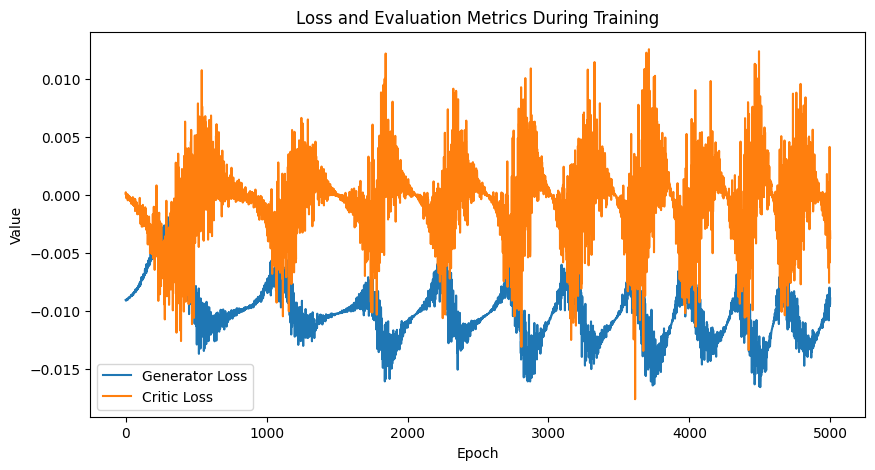

In [41]:
# Plot the losses and evaluation metrics
plt.figure(figsize=(10,5))
plt.title("Loss and Evaluation Metrics During Training")
plt.plot(losses_G, label="Generator Loss")
plt.plot(losses_C, label="Critic Loss")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()

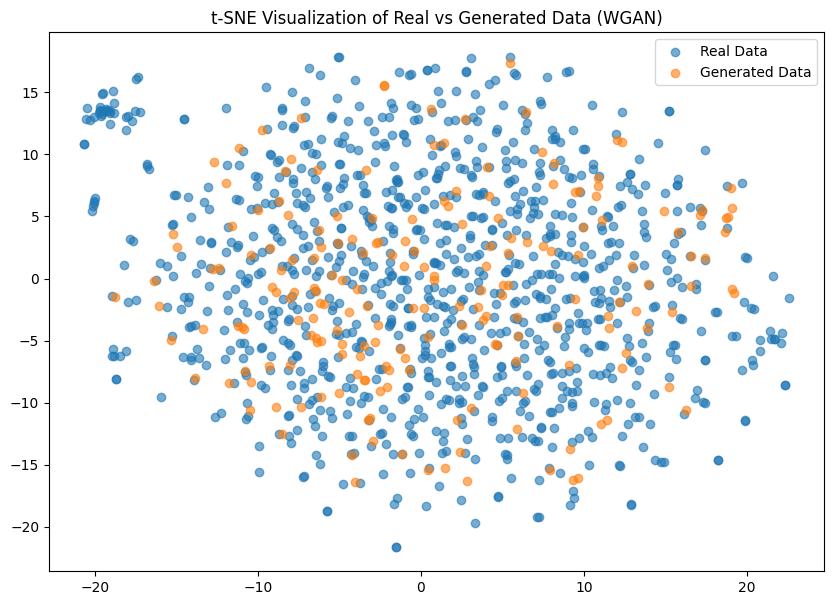

In [42]:
# Generate data for t-SNE visualization
latent_space_samples = torch.randn((1000, input_size)).to(device)
generated_data = generator(latent_space_samples).detach().cpu().numpy()

# Get real data for comparison
X_train_df = pd.DataFrame(X_train.numpy())
real_data = X_train_df.values[:1000]

# Combine real and generated data
combined_data = np.vstack([real_data, generated_data])
labels = np.array([0]*1000 + [1]*1000)  # 0 for real, 1 for generated

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE results
plt.figure(figsize=(10,7))
plt.scatter(tsne_results[:1000, 0], tsne_results[:1000, 1], label="Real Data", alpha=0.6)
plt.scatter(tsne_results[1000:, 0], tsne_results[1000:, 1], label="Generated Data", alpha=0.6)
plt.title("t-SNE Visualization of Real vs Generated Data (WGAN)")
plt.legend()
plt.show()


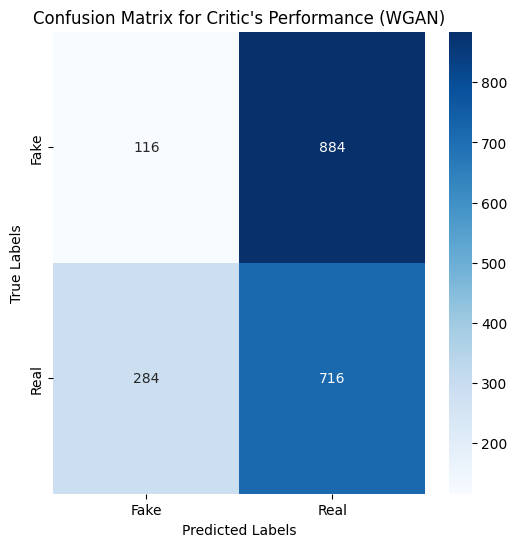

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch.nn.functional as F

# Number of samples for evaluation
n_samples = 1000

# Generate real and fake data for evaluation
real_data = X_train[torch.randint(0, X_train.size(0), (n_samples,))].to(device)
noise = torch.randn(n_samples, input_size).to(device)
fake_data = generator(noise)

# Critic predictions
critic_real = critic(real_data)
critic_fake = critic(fake_data)

# Threshold the Critic output to get binary labels (1 for real, 0 for fake)
pred_real = (critic_real >= 0).float().cpu().numpy()  # Predicted labels for real data
pred_fake = (critic_fake >= 0).float().cpu().numpy()  # Predicted labels for fake data

# Actual labels
true_real = np.ones(n_samples)  # True labels for real data (1)
true_fake = np.zeros(n_samples)  # True labels for fake data (0)

# Combine the labels
true_labels = np.concatenate([true_real, true_fake])
pred_labels = np.concatenate([pred_real, pred_fake])

# Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Critic's Performance (WGAN)")
plt.show()

## Modelling WGAN-GP

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Preprocessing

In [58]:
# One-hot encode the profession
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming 'Klasifikasi Profesi' is your target label (profession)
label_encoder = LabelEncoder()
pivoted_grades_filled['Profesi_Encoded'] = label_encoder.fit_transform(pivoted_grades_filled['Klasifikasi Profesi'])

# Select the features for prediction (e.g., IPK and scores)
X = pivoted_grades_filled.drop(['NPM', 'Klasifikasi Profesi', 'Profesi_Encoded'], axis=1)

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Define Generator and Critic (Discriminator) Models

In [59]:
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, output_size),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.net(x)


class Critic(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Critic, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(True),
            nn.Linear(hidden_size, 1)
        )
    
    def forward(self, x):
        return self.net(x)


## Gradient Penalty Function

In [60]:
def compute_gradient_penalty(critic, real_samples, fake_samples):
    alpha = torch.rand((real_samples.size(0), 1), device=device)
    alpha = alpha.expand_as(real_samples)

    # Interpolate between real and fake data
    interpolates = alpha * real_samples + (1 - alpha) * fake_samples
    interpolates = interpolates.requires_grad_(True)

    critic_interpolates = critic(interpolates)

    gradients = grad(
        outputs=critic_interpolates,
        inputs=interpolates,
        grad_outputs=torch.ones_like(critic_interpolates),
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]
    
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty


## Hyperparameters and Initial Setup

In [61]:
# Hyperparameters
input_size = 100  # Size of the noise vector
hidden_size = 128
output_size = 91  # Number of features in the dataset (exclude the target column)
lr = 0.00001  # Learning rate
batch_size = 64
n_epochs = 10000
n_critic = 5  # Critic steps per generator step
lambda_gp = 10  # Weight for gradient penalty

# Load data
data = X_scaled
X_train = data[:, :-1]  # Features
X_train = torch.tensor(X_train, dtype=torch.float32)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate models
generator = Generator(input_size, hidden_size, output_size).to(device)
critic = Critic(output_size, hidden_size).to(device)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.9))
optimizer_C = optim.Adam(critic.parameters(), lr=lr, betas=(0.5, 0.9))


## Training Loop

In [62]:
# Hyperparameters for early stopping
patience = 1000  # Number of epochs to wait for improvement
min_delta = 0.001  # Minimum change in the monitored loss to qualify as improvement
best_loss = float('inf')  # Initialize best loss with a very large number
early_stop_counter = 0  # Counter to track patience

In [63]:
# Training loop with early stopping
critic_losses = []
generator_losses = []

for epoch in range(n_epochs):
    for _ in range(n_critic):
        # Train the critic
        real_samples = X_train[torch.randint(0, X_train.size(0), (batch_size,))].to(device)
        latent_space_samples = torch.randn((batch_size, input_size)).to(device)
        fake_samples = generator(latent_space_samples).detach()

        critic_real = critic(real_samples)
        critic_fake = critic(fake_samples)

        gradient_penalty = compute_gradient_penalty(critic, real_samples, fake_samples)
        loss_critic = -torch.mean(critic_real) + torch.mean(critic_fake) + lambda_gp * gradient_penalty

        optimizer_C.zero_grad()
        loss_critic.backward()
        optimizer_C.step()

    # Train the generator
    latent_space_samples = torch.randn((batch_size, input_size)).to(device)
    fake_samples = generator(latent_space_samples)
    loss_generator = -torch.mean(critic(fake_samples))

    optimizer_G.zero_grad()
    loss_generator.backward()
    optimizer_G.step()

    # Store losses
    critic_losses.append(loss_critic.item())
    generator_losses.append(loss_generator.item())

    # Check for early stopping
    if loss_generator.item() < best_loss - min_delta:
        best_loss = loss_generator.item()  # Update best loss
        early_stop_counter = 0  # Reset counter if improvement
        # Optionally save the best model
        # torch.save(generator.state_dict(), "best_generator.pth")
        # torch.save(critic.state_dict(), "best_critic.pth")
    else:
        early_stop_counter += 1  # Increment the counter

    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break  # Stop training if patience is exceeded

    # Print losses occasionally
    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{n_epochs}] | Critic Loss: {loss_critic.item()} | Generator Loss: {loss_generator.item()}")

Epoch [0/10000] | Critic Loss: 6.677456378936768 | Generator Loss: -0.02938091568648815
Epoch [100/10000] | Critic Loss: 0.5187209844589233 | Generator Loss: -0.08630824834108353
Epoch [200/10000] | Critic Loss: 0.08986786752939224 | Generator Loss: -0.058825328946113586
Epoch [300/10000] | Critic Loss: 0.10999439656734467 | Generator Loss: 0.026906605809926987
Epoch [400/10000] | Critic Loss: -0.16562417149543762 | Generator Loss: 0.10948771238327026
Epoch [500/10000] | Critic Loss: -0.20746256411075592 | Generator Loss: 0.1314997673034668
Epoch [600/10000] | Critic Loss: -0.020596960559487343 | Generator Loss: 0.24912703037261963
Epoch [700/10000] | Critic Loss: -0.3098127841949463 | Generator Loss: 0.27739793062210083
Epoch [800/10000] | Critic Loss: -0.44686299562454224 | Generator Loss: 0.34938204288482666
Epoch [900/10000] | Critic Loss: -0.3647347390651703 | Generator Loss: 0.3035280108451843
Epoch [1000/10000] | Critic Loss: -0.19716303050518036 | Generator Loss: 0.296747028827

## Viz Losses

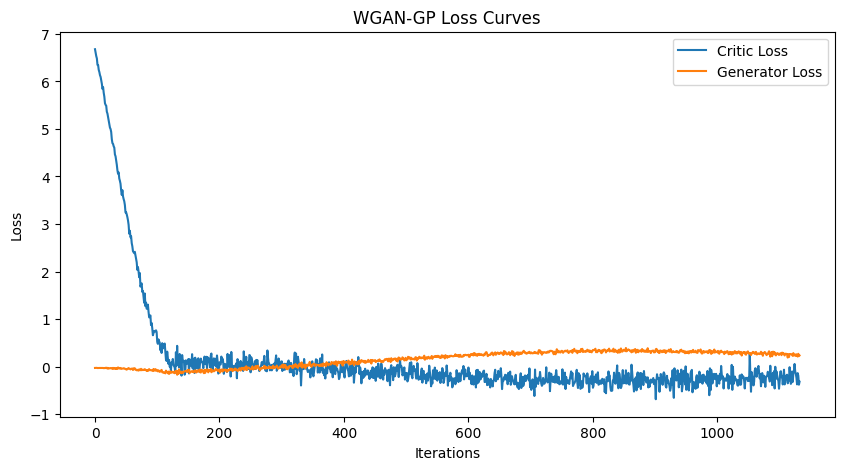

In [64]:
# Plot the loss curves
plt.figure(figsize=(10,5))
plt.plot(critic_losses, label="Critic Loss")
plt.plot(generator_losses, label="Generator Loss")
plt.title("WGAN-GP Loss Curves")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


## Visualizing Real vs Generated Data with t-SNE

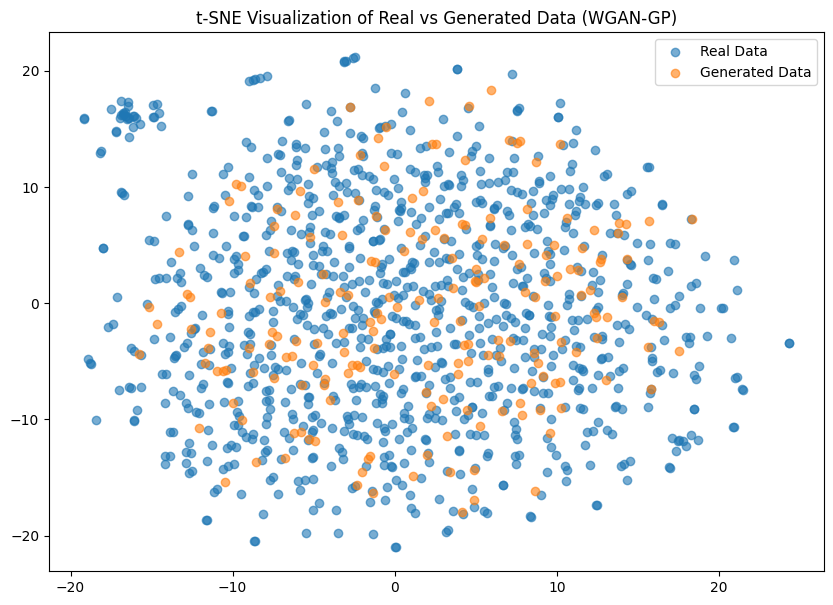

In [65]:
# Generate data for t-SNE visualization
latent_space_samples = torch.randn((1000, input_size)).to(device)
generated_data = generator(latent_space_samples).detach().cpu().numpy()

# Get real data for comparison
X_train_df = pd.DataFrame(X_train.numpy())
real_data = X_train_df.values[:1000]

# Combine real and generated data
combined_data = np.vstack([real_data, generated_data])
labels = np.array([0]*1000 + [1]*1000)  # 0 for real, 1 for generated

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(combined_data)

# Plot the t-SNE results
plt.figure(figsize=(10,7))
plt.scatter(tsne_results[:1000, 0], tsne_results[:1000, 1], label="Real Data", alpha=0.6)
plt.scatter(tsne_results[1000:, 0], tsne_results[1000:, 1], label="Generated Data", alpha=0.6)
plt.title("t-SNE Visualization of Real vs Generated Data (WGAN-GP)")
plt.legend()
plt.show()


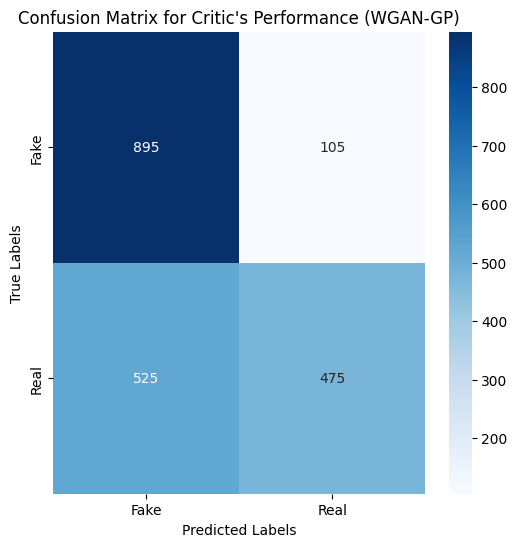

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch.nn.functional as F

# Number of samples for evaluation
n_samples = 1000

# Generate real and fake data for evaluation
real_data = X_train[torch.randint(0, X_train.size(0), (n_samples,))].to(device)
noise = torch.randn(n_samples, input_size).to(device)
fake_data = generator(noise)

# Critic predictions
critic_real = critic(real_data)
critic_fake = critic(fake_data)

# Threshold the Critic output to get binary labels (1 for real, 0 for fake)
pred_real = (critic_real >= 0).float().cpu().numpy()  # Predicted labels for real data
pred_fake = (critic_fake >= 0).float().cpu().numpy()  # Predicted labels for fake data

# Actual labels
true_real = np.ones(n_samples)  # True labels for real data (1)
true_fake = np.zeros(n_samples)  # True labels for fake data (0)

# Combine the labels
true_labels = np.concatenate([true_real, true_fake])
pred_labels = np.concatenate([pred_real, pred_fake])

# Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Critic's Performance (WGAN-GP)")
plt.show()

In [ ]:
# Load the best saved model
generator.load_state_dict(torch.load("best_generator.pth"))
critic.load_state_dict(torch.load("best_critic.pth"))

## Model Deployment